In [353]:
import pandas as pd
import numpy as np
import matplotlib as mat 
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tseries.offsets import *
from scipy import stats
import time as ti
from datetime import datetime, date, time, timedelta
s = pd.Series
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import skew

In [354]:
#ersetze in RET C und B mit nan
missing_values=["C","B","."]

In [1018]:
crsp_m = pd.read_csv("./Data/Stockreturn_monthly_1960-2018.csv",na_values=missing_values)
#crsp_m = pd.read_csv("./Data/Test.csv",na_values = missing_values)
#crsp_m = pd.read_csv("./Data/SIC CODE BANK.csv",na_values=missing_values)


crsp_m['date']=[datetime.strptime(str(date), "%Y%m%d")
for date in crsp_m['date']]

print(crsp_m.shape)

crsp_m.head()

(2434282, 7)


,PERMNO,date,SHRCD,EXCHCD,SICCD,PRC,RET
0,10001,1986-09-30,11,3,4920,6.375,-0.003077
1,10001,1986-10-31,11,3,4920,6.625,0.039216
2,10001,1986-11-28,11,3,4920,7.000,0.056604
3,10001,1986-12-31,11,3,4920,7.000,0.015000
4,10001,1987-01-30,11,3,4920,6.750,-0.035714


In [1019]:
#crsp_m[['PERMNO','SHRCD','EXCHCD']] = crsp_m[['PERMNO', 'SHRCD','EXCHCD']].astype(int)
crsp_m['RET']=crsp_m['RET'].fillna(0)
crsp_m['logret']=np.log(1+crsp_m['RET'])

#crsp_m['MktV'] = crsp_m['SHRCD']*crsp_m['PRC']
#print (crsp_m)

In [1026]:
pivm_ret=crsp_m.pivot(index='date',columns='PERMNO',values= ['RET'])
#pivm_ret.to_excel(r'Return_Monthly_Data.xlsx')

In [1027]:
#pivm = np.log(1+pivm_ret)
pivm = pivm_ret
#pivm=crsp_m.pivot(index='date',columns='PERMNO',values= ['logret'])

In [1028]:
#print(pivm) 

In [1029]:
pivm_1 = np.log(1+pivm_ret)
print(pivm_1)

                 RET                                                      \
PERMNO         10001 10002 10003     10006 10008 10009 10010 10011 10012   
date                                                                       
1960-01-29       NaN   NaN   NaN  0.005142   NaN   NaN   NaN   NaN   NaN   
1960-02-29       NaN   NaN   NaN  0.045121   NaN   NaN   NaN   NaN   NaN   
1960-03-31       NaN   NaN   NaN -0.061400   NaN   NaN   NaN   NaN   NaN   
1960-04-29       NaN   NaN   NaN -0.085334   NaN   NaN   NaN   NaN   NaN   
1960-05-31       NaN   NaN   NaN  0.047695   NaN   NaN   NaN   NaN   NaN   
1960-06-30       NaN   NaN   NaN  0.027399   NaN   NaN   NaN   NaN   NaN   
1960-07-29       NaN   NaN   NaN -0.013606   NaN   NaN   NaN   NaN   NaN   
1960-08-31       NaN   NaN   NaN -0.022162   NaN   NaN   NaN   NaN   NaN   
1960-09-30       NaN   NaN   NaN -0.153204   NaN   NaN   NaN   NaN   NaN   
1960-10-31       NaN   NaN   NaN -0.013333   NaN   NaN   NaN   NaN   NaN   
1960-11-30  

In [1030]:
Return = pivm.copy()
Return_columns = pivm.columns
Return_index = pivm.index.to_series()
Return = pd.DataFrame(index=Return_index, dtype=float, columns=Return_columns)

In [1031]:
CR_df = pivm.copy()

In [1032]:
CR_df_columns = pivm.columns
CR_df_index = pivm.index.to_series()
CR_df = pd.DataFrame(index=CR_df_index, dtype=float, columns=CR_df_columns)

In [1033]:
leni=len(CR_df_index)
lenj=len(CR_df_columns)

In [1034]:
null_matrix = pivm.isna()

In [1035]:
#If observations i all 13 months are available

null_matrix = pivm.isna().to_numpy()
for i in range(leni):
        col_index = np.sum(null_matrix[i-12:i,:], axis=0) ==0   
    #pivm.iloc[i-12:i-2, col_index]
        CR_df.iloc[i, col_index] = np.sum(pivm.iloc[i-12:i-1,col_index], axis=0)

In [1036]:
#If at least 8 observations in last 12 month are available
#needs ~  30 minutes

#start = ti.time()

#null_matrix = pivm.isna().to_numpy()
#for i in range(leni):
#        col_index = (np.sum(null_matrix[i-1:i,:], axis=0) ==0) & (np.sum(null_matrix[i-12:i,:], axis=0) < 4)
        #pivm.iloc[i-12:i-2, col_index]
#        CR_df.iloc[i, col_index] = np.sum(pivm.iloc[i-12:i-1,col_index], axis=0)
        
#end = ti.time()
#print(end - start)         

In [1037]:
#If at least 8 observations in last 12 month are available
#needs ~  30 minutes

#start = ti.time()

#null_matrix = pivm.isna().to_numpy()
#for i in range(leni):
#        col_index = (np.sum(null_matrix[i-1:i,:], axis=0) ==0) & (np.sum(null_matrix[i-12:i,:], axis=0) < 4)
#        #pivm.iloc[i-12:i-2, col_index]
#        CR_df.iloc[i, col_index] = np.sum(pivm.iloc[i-12:i-1,col_index], axis=0)
#np.log(1+)        
#end = ti.time()
#print(end - start) 

In [1038]:
print(null_matrix)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False  True False]
 [ True  True  True ... False  True False]
 [ True  True  True ... False  True False]]


In [1039]:
#for i in range(leni):
#
 #   for j in range(lenj):
  #      if np.sum(pivm.iloc[i:i-12,j].isna()) > 0:
   #         continue #0 wenn kein mal wert fehlen darf, 2 wenn max 2 mal wert fehlen darf
    #    else:
     #       CR_df.iloc[i,j] = np.sum(pivm.iloc[i-12:i-2,j])

In [1040]:
print (CR_df)

                 RET                                                      \
PERMNO         10001 10002 10003     10006 10008 10009 10010 10011 10012   
date                                                                       
1960-01-29  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-02-29  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-03-31  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-04-29  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-05-31  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-06-30  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-07-29  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-08-31  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-09-30  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-10-31  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-11-30  

In [1041]:
PT_df = CR_df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis=1).transpose()
PT_df.columns = ['Percentile 10','Percentile 20','Percentile 30','Percentile 40','Percentile 50','Percentile 60','Percentile 70','Percentile 80','Percentile 90']

In [1042]:
PT_winner_df =CR_df.quantile([0.9], axis=1).transpose()
PT_winner_df.columns = ['Percentile 90']

In [1043]:
PT_looser_df=CR_df.quantile([0.1], axis=1).transpose()
PT_looser_df.columns = ['Percentile 10']

In [1044]:
print(PT_winner_df)
print(PT_looser_df)

            Percentile 90
date                     
1960-01-29       0.000000
1960-02-29       0.000000
1960-03-31       0.000000
1960-04-29       0.000000
1960-05-31       0.000000
1960-06-30       0.000000
1960-07-29       0.000000
1960-08-31       0.000000
1960-09-30       0.000000
1960-10-31       0.000000
1960-11-30       0.000000
1960-12-30       0.000000
1961-01-31       0.285438
1961-02-28       0.376107
1961-03-30       0.409719
1961-04-28       0.523023
1961-05-31       0.625597
1961-06-30       0.550067
1961-07-31       0.549398
1961-08-31       0.545271
1961-09-29       0.488580
1961-10-31       0.602229
1961-11-30       0.577951
1961-12-29       0.545992
1962-01-31       0.586862
1962-02-28       0.464793
1962-03-30       0.371231
1962-04-30       0.315129
1962-05-31       0.294730
1962-06-29       0.188025
...                   ...
2016-07-29       0.308732
2016-08-31       0.347612
2016-09-30       0.430212
2016-10-31       0.522220
2016-11-30       0.484222
2016-12-30  

In [1045]:
#PT_df.to_excel(r'PT_df.xlsx')

print(PT_df)

            Percentile 10  Percentile 20  Percentile 30  Percentile 40  \
date                                                                     
1960-01-29       0.000000       0.000000       0.000000       0.000000   
1960-02-29       0.000000       0.000000       0.000000       0.000000   
1960-03-31       0.000000       0.000000       0.000000       0.000000   
1960-04-29       0.000000       0.000000       0.000000       0.000000   
1960-05-31       0.000000       0.000000       0.000000       0.000000   
1960-06-30       0.000000       0.000000       0.000000       0.000000   
1960-07-29       0.000000       0.000000       0.000000       0.000000   
1960-08-31       0.000000       0.000000       0.000000       0.000000   
1960-09-30       0.000000       0.000000       0.000000       0.000000   
1960-10-31       0.000000       0.000000       0.000000       0.000000   
1960-11-30       0.000000       0.000000       0.000000       0.000000   
1960-12-30       0.000000       0.0000

In [1046]:
#CR_df.to_csv(r'CR_df.csv')

In [1047]:
PT_90=PT_df['Percentile 90'].to_numpy()
PT_80=PT_df['Percentile 80'].to_numpy()
PT_70=PT_df['Percentile 70'].to_numpy()
PT_60=PT_df['Percentile 60'].to_numpy()
PT_50=PT_df['Percentile 50'].to_numpy()
PT_40=PT_df['Percentile 40'].to_numpy()
PT_30=PT_df['Percentile 30'].to_numpy()
PT_20=PT_df['Percentile 20'].to_numpy()
PT_10=PT_df['Percentile 10'].to_numpy()


true_table_d10 = CR_df.ge(PT_90, axis=0)
true_table_d9 = CR_df.ge(PT_80, axis=0) & CR_df.le(PT_90, axis=0)
true_table_d8 = CR_df.ge(PT_70, axis=0) & CR_df.le(PT_80, axis=0)
true_table_d7 = CR_df.ge(PT_60, axis=0) & CR_df.le(PT_70, axis=0)
true_table_d6 = CR_df.ge(PT_50, axis=0) & CR_df.le(PT_60, axis=0)
true_table_d5 = CR_df.ge(PT_40, axis=0) & CR_df.le(PT_50, axis=0)
true_table_d4 = CR_df.ge(PT_30, axis=0) & CR_df.le(PT_40, axis=0)
true_table_d3 = CR_df.ge(PT_20, axis=0) & CR_df.le(PT_30, axis=0)
true_table_d2 = CR_df.ge(PT_10, axis=0) & CR_df.le(PT_20, axis=0)
true_table_d1 = CR_df.le(PT_10, axis=0)


In [1048]:
print(true_table_d5)

              RET                                                          \
PERMNO      10001  10002  10003  10006  10008  10009  10010  10011  10012   
date                                                                        
1960-01-29   True   True   True   True   True   True   True   True   True   
1960-02-29   True   True   True   True   True   True   True   True   True   
1960-03-31   True   True   True   True   True   True   True   True   True   
1960-04-29   True   True   True   True   True   True   True   True   True   
1960-05-31   True   True   True   True   True   True   True   True   True   
1960-06-30   True   True   True   True   True   True   True   True   True   
1960-07-29   True   True   True   True   True   True   True   True   True   
1960-08-31   True   True   True   True   True   True   True   True   True   
1960-09-30   True   True   True   True   True   True   True   True   True   
1960-10-31   True   True   True   True   True   True   True   True   True   

In [1049]:
pivm_ret[true_table_d10]

RET                                                      \
PERMNO         10001 10002 10003     10006 10008 10009 10010 10011 10012   
date                                                                       
1960-01-29       NaN   NaN   NaN  0.005155   NaN   NaN   NaN   NaN   NaN   
1960-02-29       NaN   NaN   NaN  0.046154   NaN   NaN   NaN   NaN   NaN   
1960-03-31       NaN   NaN   NaN -0.059553   NaN   NaN   NaN   NaN   NaN   
1960-04-29       NaN   NaN   NaN -0.081794   NaN   NaN   NaN   NaN   NaN   
1960-05-31       NaN   NaN   NaN  0.048851   NaN   NaN   NaN   NaN   NaN   
1960-06-30       NaN   NaN   NaN  0.027778   NaN   NaN   NaN   NaN   NaN   
1960-07-29       NaN   NaN   NaN -0.013514   NaN   NaN   NaN   NaN   NaN   
1960-08-31       NaN   NaN   NaN -0.021918   NaN   NaN   NaN   NaN   NaN   
1960-09-30       NaN   NaN   NaN -0.142045   NaN   NaN   NaN   NaN   NaN   
1960-10-31       NaN   NaN   NaN -0.013245   NaN   NaN   NaN   NaN   NaN   
1960-11-30       NaN   NaN   NaN  0.003356   NaN   NaN   NaN   NaN   NaN   
1960-12-30       NaN   NaN   NaN  0.034014   NaN   NaN   NaN   NaN   NaN   
1961-01-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-02-28       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-03-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-04-28       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-05-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-06-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-07-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-08-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-09-29       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-10-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-11-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-12-29       NaN   NaN   NaN  0.082661   NaN   NaN   NaN   NaN   NaN   
1962-01-31       NaN   NaN   NaN  0.087523   NaN   NaN   NaN   NaN   NaN   
1962-02-28       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1962-03-30       NaN   NaN   NaN -0.071672   NaN   NaN   NaN   NaN   NaN   
1962-04-30       NaN   NaN   NaN  0.056985   NaN   NaN   NaN   NaN   NaN   
1962-05-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1962-06-29       NaN   NaN   NaN -0.012552   NaN   NaN   NaN   NaN   NaN   
...              ...   ...   ...       ...   ...   ...   ...   ...   ...   
2016-07-29       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-08-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-09-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-10-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-11-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-12-30  0.010000   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-01-31  0.007968   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-02-28       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-03-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-04-28 -0.015748   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-05-31  0.016000   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-06-30  0.023622   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-07-31  0.001934   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-08-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-09-29       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-10-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-11-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-12-29       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2018-01-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   Na

In [1050]:
np.sum(pivm[true_table_d10], axis=1)

date
1960-01-29   -37.902551
1960-02-29     9.754396
1960-03-31   -24.420029
1960-04-29   -19.500032
1960-05-31    28.149258
1960-06-30    23.025074
1960-07-29   -19.814981
1960-08-31    38.887402
1960-09-30   -61.856838
1960-10-31   -24.556004
1960-11-30    49.427976
1960-12-30    40.809981
1961-01-31     2.780403
1961-02-28     8.238067
1961-03-30     8.035722
1961-04-28     2.098686
1961-05-31     1.496475
1961-06-30    -4.083651
1961-07-31     1.578446
1961-08-31     3.276942
1961-09-29    -3.110126
1961-10-31     4.989684
1961-11-30     6.893459
1961-12-29    -1.187716
1962-01-31    -3.281304
1962-02-28     0.808507
1962-03-30    -0.145891
1962-04-30    -5.494563
1962-05-31    -9.582451
1962-06-29    -4.858203
                ...    
2016-07-29    15.462490
2016-08-31     1.620931
2016-09-30    16.638687
2016-10-31   -24.887359
2016-11-30    36.905224
2016-12-30    -1.135966
2017-01-31     4.597343
2017-02-28     0.867731
2017-03-31    -2.211776
2017-04-28    -0.828969
2017-05-31 

In [1051]:
np.sum(true_table_d10, axis=1)

date
1960-01-29    18383
1960-02-29    20213
1960-03-31    20213
1960-04-29    20213
1960-05-31    20213
1960-06-30    20213
1960-07-29    20213
1960-08-31    20213
1960-09-30    20213
1960-10-31    20213
1960-11-30    20213
1960-12-30    20213
1961-01-31       79
1961-02-28       79
1961-03-30       80
1961-04-28       81
1961-05-31       82
1961-06-30       83
1961-07-31       83
1961-08-31       84
1961-09-29       85
1961-10-31       85
1961-11-30       86
1961-12-29       87
1962-01-31       87
1962-02-28       87
1962-03-30       85
1962-04-30       85
1962-05-31       85
1962-06-29       86
              ...  
2016-07-29      305
2016-08-31      305
2016-09-30      304
2016-10-31      303
2016-11-30      304
2016-12-30      302
2017-01-31      301
2017-02-28      300
2017-03-31      300
2017-04-28      300
2017-05-31      300
2017-06-30      301
2017-07-31      302
2017-08-31      303
2017-09-29      302
2017-10-31      304
2017-11-30      304
2017-12-29      303
2018-01-31     

In [1052]:
d10 = np.sum(pivm_ret[true_table_d10], axis=1)/np.sum(true_table_d10, axis=1)
d10[0:12] = 0

In [1053]:
print (d10)

date
1960-01-29    0.000000
1960-02-29    0.000000
1960-03-31    0.000000
1960-04-29    0.000000
1960-05-31    0.000000
1960-06-30    0.000000
1960-07-29    0.000000
1960-08-31    0.000000
1960-09-30    0.000000
1960-10-31    0.000000
1960-11-30    0.000000
1960-12-30    0.000000
1961-01-31    0.035195
1961-02-28    0.104279
1961-03-30    0.100447
1961-04-28    0.025910
1961-05-31    0.018250
1961-06-30   -0.049201
1961-07-31    0.019017
1961-08-31    0.039011
1961-09-29   -0.036590
1961-10-31    0.058702
1961-11-30    0.080157
1961-12-29   -0.013652
1962-01-31   -0.037716
1962-02-28    0.009293
1962-03-30   -0.001716
1962-04-30   -0.064642
1962-05-31   -0.112735
1962-06-29   -0.056491
                ...   
2016-07-29    0.050697
2016-08-31    0.005315
2016-09-30    0.054733
2016-10-31   -0.082136
2016-11-30    0.121399
2016-12-30   -0.003761
2017-01-31    0.015274
2017-02-28    0.002892
2017-03-31   -0.007373
2017-04-28   -0.002763
2017-05-31   -0.008373
2017-06-30    0.023563
2017-0

In [1054]:
d9 = np.sum(pivm_ret[true_table_d9], axis=1)/np.sum(true_table_d9, axis=1)
d9[0:12] = 0
d8 = np.sum(pivm_ret[true_table_d8], axis=1)/np.sum(true_table_d8, axis=1)
d8[0:12] = 0
d7 = np.sum(pivm_ret[true_table_d7], axis=1)/np.sum(true_table_d7, axis=1)
d7[0:12] = 0
d6 = np.sum(pivm_ret[true_table_d6], axis=1)/np.sum(true_table_d6, axis=1)
d6[0:12] = 0
d5 = np.sum(pivm_ret[true_table_d5], axis=1)/np.sum(true_table_d5, axis=1)
d5[0:12] = 0
d4 = np.sum(pivm_ret[true_table_d4], axis=1)/np.sum(true_table_d4, axis=1)
d4[0:12] = 0
d3 = np.sum(pivm_ret[true_table_d3], axis=1)/np.sum(true_table_d3, axis=1)
d3[0:12] = 0
d2 = np.sum(pivm_ret[true_table_d2], axis=1)/np.sum(true_table_d2, axis=1)
d2[0:12] = 0

In [1055]:
CR_df[true_table_d1]

RET                                                            \
PERMNO     10001 10002 10003 10006 10008 10009 10010 10011 10012     10014   
date                                                                         
1960-01-29   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-02-29   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-03-31   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-04-29   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-05-31   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-06-30   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-07-29   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-08-31   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-09-30   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-10-31   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-11-30   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1960-12-30   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1961-01-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-02-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-03-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.312826   
1961-04-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.121159   
1961-05-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-06-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.171525   
1961-07-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-08-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-09-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-10-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-11-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-12-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-01-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-02-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-03-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-04-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-05-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-06-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...       ...   
2016-07-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-08-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-09-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-10-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-11-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-12-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-01-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-02-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-03-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-04-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-05-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-06-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-07-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-08-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-09-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-10-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-11-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-12-29   NaN   NaN   NaN   NaN 

In [1056]:
np.sum(pivm_ret[true_table_d1], axis=1)

date
1960-01-29   -38.264151
1960-02-29     9.754396
1960-03-31   -24.420029
1960-04-29   -19.500032
1960-05-31    28.149258
1960-06-30    23.025074
1960-07-29   -19.814981
1960-08-31    38.887402
1960-09-30   -61.856838
1960-10-31   -24.556004
1960-11-30    49.427976
1960-12-30    40.809981
1961-01-31    10.133725
1961-02-28     6.309934
1961-03-30     4.046860
1961-04-28    -2.057741
1961-05-31     5.811465
1961-06-30    -5.082175
1961-07-31    -0.313663
1961-08-31     2.165366
1961-09-29    -4.715239
1961-10-31    -0.284577
1961-11-30     4.426423
1961-12-29     1.169103
1962-01-31    -0.161736
1962-02-28     0.117198
1962-03-30    -2.436482
1962-04-30    -7.451798
1962-05-31   -10.634562
1962-06-29   -11.270522
                ...    
2016-07-29    25.204389
2016-08-31    15.123786
2016-09-30    25.690715
2016-10-31   -28.583765
2016-11-30    24.677099
2016-12-30     5.548851
2017-01-31     8.019066
2017-02-28     6.031377
2017-03-31     7.117155
2017-04-28    -3.999795
2017-05-31 

In [1057]:
np.sum(true_table_d1, axis=1)

date
1960-01-29    18280
1960-02-29    20213
1960-03-31    20213
1960-04-29    20213
1960-05-31    20213
1960-06-30    20213
1960-07-29    20213
1960-08-31    20213
1960-09-30    20213
1960-10-31    20213
1960-11-30    20213
1960-12-30    20213
1961-01-31       79
1961-02-28       79
1961-03-30       80
1961-04-28       81
1961-05-31       82
1961-06-30       83
1961-07-31       83
1961-08-31       84
1961-09-29       85
1961-10-31       85
1961-11-30       86
1961-12-29       87
1962-01-31       87
1962-02-28       87
1962-03-30       85
1962-04-30       85
1962-05-31       85
1962-06-29       86
              ...  
2016-07-29      305
2016-08-31      305
2016-09-30      304
2016-10-31      303
2016-11-30      304
2016-12-30      302
2017-01-31      301
2017-02-28      300
2017-03-31      300
2017-04-28      300
2017-05-31      300
2017-06-30      301
2017-07-31      302
2017-08-31      303
2017-09-29      302
2017-10-31      304
2017-11-30      304
2017-12-29      303
2018-01-31     

In [1058]:
d1 = np.sum(pivm_ret[true_table_d1], axis=1)/np.sum(true_table_d1, axis=1)
d1[0:12] = 0

In [1059]:
print(d1)

date
1960-01-29    0.000000
1960-02-29    0.000000
1960-03-31    0.000000
1960-04-29    0.000000
1960-05-31    0.000000
1960-06-30    0.000000
1960-07-29    0.000000
1960-08-31    0.000000
1960-09-30    0.000000
1960-10-31    0.000000
1960-11-30    0.000000
1960-12-30    0.000000
1961-01-31    0.128275
1961-02-28    0.079873
1961-03-30    0.050586
1961-04-28   -0.025404
1961-05-31    0.070872
1961-06-30   -0.061231
1961-07-31   -0.003779
1961-08-31    0.025778
1961-09-29   -0.055473
1961-10-31   -0.003348
1961-11-30    0.051470
1961-12-29    0.013438
1962-01-31   -0.001859
1962-02-28    0.001347
1962-03-30   -0.028664
1962-04-30   -0.087668
1962-05-31   -0.125112
1962-06-29   -0.131053
                ...   
2016-07-29    0.082637
2016-08-31    0.049586
2016-09-30    0.084509
2016-10-31   -0.094336
2016-11-30    0.081175
2016-12-30    0.018374
2017-01-31    0.026641
2017-02-28    0.020105
2017-03-31    0.023724
2017-04-28   -0.013333
2017-05-31   -0.052588
2017-06-30    0.067639
2017-0

In [1060]:
wml = d10 - d1
d9_d1 = d9 - d1

In [1061]:
print (wml)

date
1960-01-29    0.000000
1960-02-29    0.000000
1960-03-31    0.000000
1960-04-29    0.000000
1960-05-31    0.000000
1960-06-30    0.000000
1960-07-29    0.000000
1960-08-31    0.000000
1960-09-30    0.000000
1960-10-31    0.000000
1960-11-30    0.000000
1960-12-30    0.000000
1961-01-31   -0.093080
1961-02-28    0.024407
1961-03-30    0.049861
1961-04-28    0.051314
1961-05-31   -0.052622
1961-06-30    0.012030
1961-07-31    0.022796
1961-08-31    0.013233
1961-09-29    0.018884
1961-10-31    0.062050
1961-11-30    0.028686
1961-12-29   -0.027090
1962-01-31   -0.035857
1962-02-28    0.007946
1962-03-30    0.026948
1962-04-30    0.023026
1962-05-31    0.012378
1962-06-29    0.074562
                ...   
2016-07-29   -0.031941
2016-08-31   -0.044272
2016-09-30   -0.029776
2016-10-31    0.012199
2016-11-30    0.040224
2016-12-30   -0.022135
2017-01-31   -0.011368
2017-02-28   -0.017212
2017-03-31   -0.031096
2017-04-28    0.010569
2017-05-31    0.044214
2017-06-30   -0.044076
2017-0

In [1062]:
# Descriptive Information of created Allocation0 DataFrame
#print(momentum.info())
print(wml.head(7))
print(wml.tail(7))
print(wml.shape)

date
1960-01-29    0.0
1960-02-29    0.0
1960-03-31    0.0
1960-04-29    0.0
1960-05-31    0.0
1960-06-30    0.0
1960-07-29    0.0
dtype: float64
date
2018-06-29   -0.012509
2018-07-31    0.008367
2018-08-31    0.088740
2018-09-28   -0.018241
2018-10-31    0.009933
2018-11-30   -0.028065
2018-12-31    0.016377
dtype: float64
(708,)


count    708.000000
mean       0.010726
std        0.058944
min       -0.427834
25%       -0.013200
50%        0.013420
75%        0.041750
max        0.328139
dtype: float64

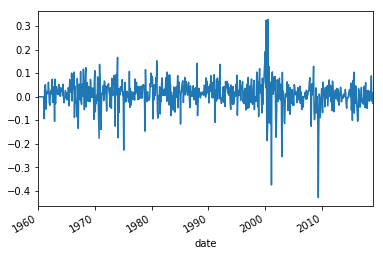

In [1063]:
wml.plot()
wml.describe()

count    708.000000
mean       0.016647
std        0.075177
min       -0.324925
25%       -0.025120
50%        0.019079
75%        0.062570
max        0.395285
dtype: float64

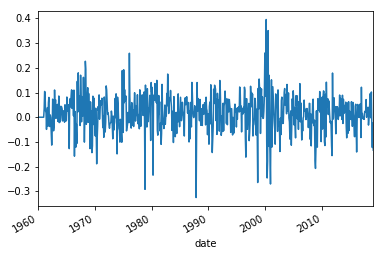

In [1064]:
d10.plot()
d10.describe()

count    708.000000
mean       0.005921
std        0.080642
min       -0.292631
25%       -0.040579
50%        0.000920
75%        0.044866
max        0.525698
dtype: float64

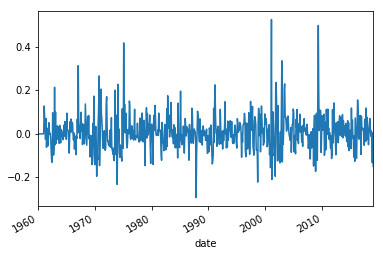

In [1065]:
d1.plot()
d1.describe()

In [1066]:
skew(wml)

-1.0247372317831505

In [1067]:
kurtosis(wml)

9.66111961706994

In [1068]:
winner1= d10 +1
loser1 = d1 + 1
momentum1=wml +1
d9_d1_1 = d9_d1+ 1

In [1069]:
momentum1.to_excel(r'Momentum_TEST.xlsx')
print (momentum1)

date
1960-01-29    1.000000
1960-02-29    1.000000
1960-03-31    1.000000
1960-04-29    1.000000
1960-05-31    1.000000
1960-06-30    1.000000
1960-07-29    1.000000
1960-08-31    1.000000
1960-09-30    1.000000
1960-10-31    1.000000
1960-11-30    1.000000
1960-12-30    1.000000
1961-01-31    0.906920
1961-02-28    1.024407
1961-03-30    1.049861
1961-04-28    1.051314
1961-05-31    0.947378
1961-06-30    1.012030
1961-07-31    1.022796
1961-08-31    1.013233
1961-09-29    1.018884
1961-10-31    1.062050
1961-11-30    1.028686
1961-12-29    0.972910
1962-01-31    0.964143
1962-02-28    1.007946
1962-03-30    1.026948
1962-04-30    1.023026
1962-05-31    1.012378
1962-06-29    1.074562
                ...   
2016-07-29    0.968059
2016-08-31    0.955728
2016-09-30    0.970224
2016-10-31    1.012199
2016-11-30    1.040224
2016-12-30    0.977865
2017-01-31    0.988632
2017-02-28    0.982788
2017-03-31    0.968904
2017-04-28    1.010569
2017-05-31    1.044214
2017-06-30    0.955924
2017-0

In [1070]:
cumulative_momentum_df =momentum1.copy()
cumulative_momentum_df = cumulative_momentum_df.iloc[11:]
cumulative_momentum_df = s.cumprod(cumulative_momentum_df)

cumulative_d9_d1 =d9_d1_1.copy()
cumulative_d9_d1 = cumulative_d9_d1.iloc[11:]
cumulative_d9_d1 = s.cumprod(cumulative_d9_d1)


In [1071]:
print (cumulative_momentum_df)

date
1960-12-30      1.000000
1961-01-31      0.906920
1961-02-28      0.929055
1961-03-30      0.975378
1961-04-28      1.025429
1961-05-31      0.971469
1961-06-30      0.983156
1961-07-31      1.005569
1961-08-31      1.018875
1961-09-29      1.038115
1961-10-31      1.102531
1961-11-30      1.134158
1961-12-29      1.103434
1962-01-31      1.063868
1962-02-28      1.072322
1962-03-30      1.101219
1962-04-30      1.126576
1962-05-31      1.140520
1962-06-29      1.225560
1962-07-31      1.196549
1962-08-31      1.173212
1962-09-28      1.223176
1962-10-31      1.242392
1962-11-30      1.112875
1962-12-31      1.195797
1963-01-31      1.160618
1963-02-28      1.206191
1963-03-29      1.257935
1963-04-30      1.281082
1963-05-31      1.300023
                 ...    
2016-07-29    528.222065
2016-08-31    504.836799
2016-09-30    489.804573
2016-10-31    495.779875
2016-11-30    515.722172
2016-12-30    504.306582
2017-01-31    498.573700
2017-02-28    489.992173
2017-03-31    474.75

In [1072]:
cumulative_winner_df = winner1.copy()
cumulative_winner_df = cumulative_winner_df.iloc[11:]
cumulative_winner_df = s.cumprod(cumulative_winner_df)

In [1073]:
cumulative_loser_df = loser1.copy()
cumulative_loser_df = cumulative_loser_df.iloc[11:]
cumulative_loser_df = s.cumprod(cumulative_loser_df)

In [1074]:
print (cumulative_winner_df)

date
1960-12-30        1.000000
1961-01-31        1.035195
1961-02-28        1.143144
1961-03-30        1.257969
1961-04-28        1.290563
1961-05-31        1.314115
1961-06-30        1.249460
1961-07-31        1.273222
1961-08-31        1.322891
1961-09-29        1.274487
1961-10-31        1.349302
1961-11-30        1.457458
1961-12-29        1.437561
1962-01-31        1.383341
1962-02-28        1.396197
1962-03-30        1.393801
1962-04-30        1.303703
1962-05-31        1.156730
1962-06-29        1.091386
1962-07-31        1.171341
1962-08-31        1.211546
1962-09-28        1.145043
1962-10-31        1.103250
1962-11-30        1.224794
1962-12-31        1.253842
1963-01-31        1.342433
1963-02-28        1.336197
1963-03-29        1.388994
1963-04-30        1.454313
1963-05-31        1.529784
                  ...     
2016-07-29    14014.527913
2016-08-31    14089.008512
2016-09-30    14860.135495
2016-10-31    13639.576001
2016-11-30    15295.403657
2016-12-30    15237.870

In [1075]:
print (cumulative_loser_df)

date
1960-12-30    1.000000
1961-01-31    1.128275
1961-02-28    1.218393
1961-03-30    1.280027
1961-04-28    1.247509
1961-05-31    1.335921
1961-06-30    1.254122
1961-07-31    1.249382
1961-08-31    1.281589
1961-09-29    1.210495
1961-10-31    1.206442
1961-11-30    1.268538
1961-12-29    1.285584
1962-01-31    1.283194
1962-02-28    1.284923
1962-03-30    1.248091
1962-04-30    1.138673
1962-05-31    0.996211
1962-06-29    0.865655
1962-07-31    0.949565
1962-08-31    1.000677
1962-09-28    0.903133
1962-10-31    0.855981
1962-11-30    1.039518
1962-12-31    0.986716
1963-01-31    1.085461
1963-02-28    1.037797
1963-03-29    1.034283
1963-04-30    1.063889
1963-05-31    1.103369
                ...   
2016-07-29    6.408192
2016-08-31    6.725950
2016-09-30    7.294353
2016-10-31    6.606234
2016-11-30    7.142492
2016-12-30    7.273726
2017-01-31    7.467509
2017-02-28    7.617640
2017-03-31    7.798359
2017-04-28    7.694387
2017-05-31    7.289757
2017-06-30    7.782829
2017-0

In [1076]:
print (cumulative_momentum_df)

date
1960-12-30      1.000000
1961-01-31      0.906920
1961-02-28      0.929055
1961-03-30      0.975378
1961-04-28      1.025429
1961-05-31      0.971469
1961-06-30      0.983156
1961-07-31      1.005569
1961-08-31      1.018875
1961-09-29      1.038115
1961-10-31      1.102531
1961-11-30      1.134158
1961-12-29      1.103434
1962-01-31      1.063868
1962-02-28      1.072322
1962-03-30      1.101219
1962-04-30      1.126576
1962-05-31      1.140520
1962-06-29      1.225560
1962-07-31      1.196549
1962-08-31      1.173212
1962-09-28      1.223176
1962-10-31      1.242392
1962-11-30      1.112875
1962-12-31      1.195797
1963-01-31      1.160618
1963-02-28      1.206191
1963-03-29      1.257935
1963-04-30      1.281082
1963-05-31      1.300023
                 ...    
2016-07-29    528.222065
2016-08-31    504.836799
2016-09-30    489.804573
2016-10-31    495.779875
2016-11-30    515.722172
2016-12-30    504.306582
2017-01-31    498.573700
2017-02-28    489.992173
2017-03-31    474.75

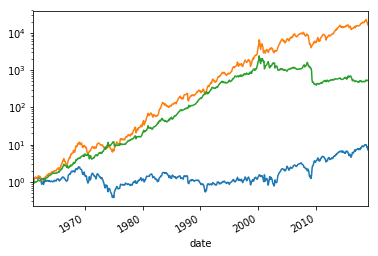

In [1077]:
plt.yscale('log')
cumulative_loser_df.plot() #blue
cumulative_winner_df.plot() #orange
cumulative_momentum_df.plot() #green

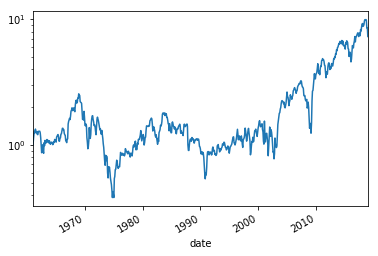

In [1078]:
plt.yscale('log')
cumulative_loser_df.plot()

In [1079]:
cumulative_loser_df.describe()

count    697.000000
mean       2.058730
std        1.880698
min        0.380449
25%        1.028365
50%        1.280027
75%        2.179488
max        9.967495
dtype: float64

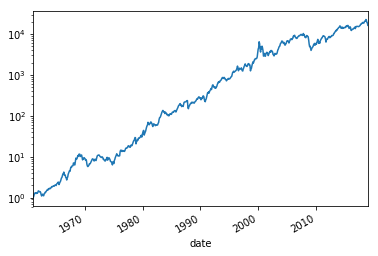

In [1080]:
plt.yscale('log')
cumulative_winner_df.plot()

In [1081]:
cumulative_winner_df.describe()

count      697.000000
mean      3237.604209
std       5005.547487
min          1.000000
25%         11.026974
50%        260.362204
75%       5427.429764
max      22777.333459
dtype: float64

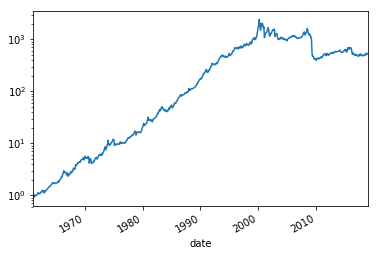

In [1082]:
plt.yscale('log')
cumulative_momentum_df.plot()

In [1083]:
cumulative_momentum_df.describe()

count     697.000000
mean      402.698830
std       473.726050
min         0.906920
25%         9.993864
50%       173.007240
75%       609.840438
max      2406.161953
dtype: float64

In [1084]:
FF3_df = pd.read_csv("./data/FF_3_Factors_monthly.csv",delimiter=';')
headers = FF3_df.iloc[0]
#FF3_df.columns = ['Date' if x=='Unnamed: 0' else  x for x in FF3_df.columns]

FF3_df.reset_index()
FF3_df.index=(pivm.index)


In [1085]:

#FF3_df['date']=[datetime.strptime(str(date), "%Y%m")
#for date in FF3_df['date']]
#CR_df_index = pivm.index.to_series()

#FF3_df_columns = FF3_df.columns
#FF3_df_index = pivm.index.to_series()
#FF3_df_new = pd.DataFrame(index=FF3_df_index, dtype=float, columns=FF3_df_columns)

#FF3_df_new = pd.concat([FF3_df_new,FF3_df])
#FF3_df_new('Mkt-RF','SMB','HML','RF') = FF3_df('Mkt-RF','SMB','HML','RF')

In [1086]:
print(FF3_df)

            Mkt-RF   SMB   HML    RF
date                                
1960-01-29   -6.98  2.09  2.73  0.33
1960-02-29    1.17  0.51 -1.99  0.29
1960-03-31   -1.63 -0.51 -2.85  0.35
1960-04-29   -1.71  0.31 -2.23  0.19
1960-05-31    3.12  1.21 -3.76  0.27
1960-06-30    2.08 -0.22 -0.34  0.24
1960-07-29   -2.37 -0.52  2.03  0.13
1960-08-31    3.01  0.90 -0.19  0.17
1960-09-30   -5.99 -1.11  1.58  0.16
1960-10-31   -0.71 -3.95  2.60  0.22
1960-11-30    4.69  0.35 -2.45  0.13
1960-12-30    4.71 -1.56 -0.79  0.16
1961-01-31    6.20  0.66  3.70  0.19
1961-02-28    3.57  3.98 -0.74  0.14
1961-03-30    2.89  3.27 -0.77  0.20
1961-04-28    0.29  0.10  2.05  0.17
1961-05-31    2.40  1.95  0.48  0.18
1961-06-30   -3.08 -2.47 -0.18  0.20
1961-07-31    2.83 -1.88 -0.11  0.18
1961-08-31    2.57 -1.75 -0.28  0.14
1961-09-29   -2.15 -1.05 -0.58  0.17
1961-10-31    2.57 -1.61  0.12  0.19
1961-11-30    4.45  1.24 -1.19  0.15
1961-12-29   -0.18 -0.83  1.83  0.19
1962-01-31   -3.87  1.78  5.09  0.24
1

In [1087]:
Mkt = (FF3_df['RF']/100)+(FF3_df['Mkt-RF']/100)
Mkt[0:12] = 0
Mkt_1 = Mkt+1

RF= FF3_df['RF']/100
RF[0:12] = 0
RF_1=RF+1

Mkt_RF=(FF3_df['Mkt-RF']/100)
Mkt_RF[0:12] = 0 
Mkt_RF_1=Mkt_RF+1

In [1088]:
print(RF_1)

date
1960-01-29    1.0000
1960-02-29    1.0000
1960-03-31    1.0000
1960-04-29    1.0000
1960-05-31    1.0000
1960-06-30    1.0000
1960-07-29    1.0000
1960-08-31    1.0000
1960-09-30    1.0000
1960-10-31    1.0000
1960-11-30    1.0000
1960-12-30    1.0000
1961-01-31    1.0019
1961-02-28    1.0014
1961-03-30    1.0020
1961-04-28    1.0017
1961-05-31    1.0018
1961-06-30    1.0020
1961-07-31    1.0018
1961-08-31    1.0014
1961-09-29    1.0017
1961-10-31    1.0019
1961-11-30    1.0015
1961-12-29    1.0019
1962-01-31    1.0024
1962-02-28    1.0020
1962-03-30    1.0020
1962-04-30    1.0022
1962-05-31    1.0024
1962-06-29    1.0020
               ...  
2016-07-29    1.0002
2016-08-31    1.0002
2016-09-30    1.0002
2016-10-31    1.0002
2016-11-30    1.0001
2016-12-30    1.0003
2017-01-31    1.0004
2017-02-28    1.0004
2017-03-31    1.0003
2017-04-28    1.0005
2017-05-31    1.0006
2017-06-30    1.0006
2017-07-31    1.0007
2017-08-31    1.0009
2017-09-29    1.0009
2017-10-31    1.0009
2017-11-

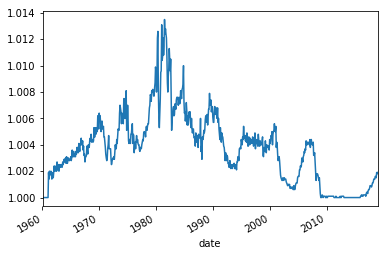

In [1089]:
RF_1.plot()

In [1090]:
print(Mkt_RF_1)

date
1960-01-29    1.0000
1960-02-29    1.0000
1960-03-31    1.0000
1960-04-29    1.0000
1960-05-31    1.0000
1960-06-30    1.0000
1960-07-29    1.0000
1960-08-31    1.0000
1960-09-30    1.0000
1960-10-31    1.0000
1960-11-30    1.0000
1960-12-30    1.0000
1961-01-31    1.0620
1961-02-28    1.0357
1961-03-30    1.0289
1961-04-28    1.0029
1961-05-31    1.0240
1961-06-30    0.9692
1961-07-31    1.0283
1961-08-31    1.0257
1961-09-29    0.9785
1961-10-31    1.0257
1961-11-30    1.0445
1961-12-29    0.9982
1962-01-31    0.9613
1962-02-28    1.0181
1962-03-30    0.9932
1962-04-30    0.9341
1962-05-31    0.9135
1962-06-29    0.9153
               ...  
2016-07-29    1.0395
2016-08-31    1.0050
2016-09-30    1.0025
2016-10-31    0.9798
2016-11-30    1.0486
2016-12-30    1.0182
2017-01-31    1.0194
2017-02-28    1.0357
2017-03-31    1.0017
2017-04-28    1.0109
2017-05-31    1.0106
2017-06-30    1.0078
2017-07-31    1.0187
2017-08-31    1.0016
2017-09-29    1.0251
2017-10-31    1.0225
2017-11-

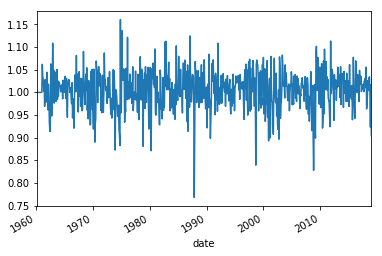

In [1091]:
Mkt_RF_1.plot()


count    708.000000
mean       0.003682
std        0.002639
min        0.000000
25%        0.001600
50%        0.003800
75%        0.005100
max        0.013500
Name: RF, dtype: float64

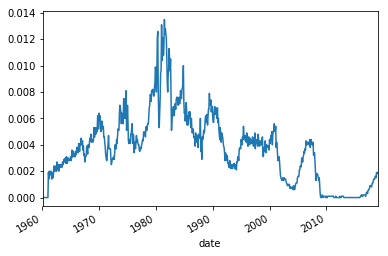

In [1092]:
RF.plot()
RF.describe()

In [1093]:
cumulative_RF_df = RF_1.copy()
cumulative_RF_df = cumulative_RF_df.iloc[11:]
cumulative_RF_df = s.cumprod(cumulative_RF_df)
print(cumulative_RF_df)


date
1960-12-30     1.000000
1961-01-31     1.001900
1961-02-28     1.003303
1961-03-30     1.005309
1961-04-28     1.007018
1961-05-31     1.008831
1961-06-30     1.010849
1961-07-31     1.012668
1961-08-31     1.014086
1961-09-29     1.015810
1961-10-31     1.017740
1961-11-30     1.019266
1961-12-29     1.021203
1962-01-31     1.023654
1962-02-28     1.025701
1962-03-30     1.027753
1962-04-30     1.030014
1962-05-31     1.032486
1962-06-29     1.034551
1962-07-31     1.037344
1962-08-31     1.039730
1962-09-28     1.041913
1962-10-31     1.044518
1962-11-30     1.046607
1962-12-31     1.049014
1963-01-31     1.051637
1963-02-28     1.054056
1963-03-29     1.056480
1963-04-30     1.059121
1963-05-31     1.061663
                ...    
2016-07-29    13.103624
2016-08-31    13.106244
2016-09-30    13.108866
2016-10-31    13.111487
2016-11-30    13.112799
2016-12-30    13.116732
2017-01-31    13.121979
2017-02-28    13.127228
2017-03-31    13.131166
2017-04-28    13.137732
2017-05-31 

In [1094]:
cumulative_Mkt_RF_df = Mkt_RF_1.copy()
cumulative_Mkt_RF_df = cumulative_Mkt_RF_df.iloc[11:]
cumulative_Mkt_RF_df = s.cumprod(cumulative_Mkt_RF_df)
print(cumulative_Mkt_RF_df)

cumulative_Mkt_df = Mkt_1.copy()
cumulative_Mkt_df = cumulative_Mkt_df.iloc[11:]
cumulative_Mkt_df = s.cumprod(cumulative_Mkt_df)

date
1960-12-30     1.000000
1961-01-31     1.062000
1961-02-28     1.099913
1961-03-30     1.131701
1961-04-28     1.134983
1961-05-31     1.162222
1961-06-30     1.126426
1961-07-31     1.158304
1961-08-31     1.188072
1961-09-29     1.162529
1961-10-31     1.192406
1961-11-30     1.245468
1961-12-29     1.243226
1962-01-31     1.195113
1962-02-28     1.216745
1962-03-30     1.208471
1962-04-30     1.128832
1962-05-31     1.031188
1962-06-29     0.943847
1962-07-31     1.003120
1962-08-31     1.024487
1962-09-28     0.971009
1962-10-31     0.970523
1962-11-30     1.076019
1962-12-31     1.086887
1963-01-31     1.140470
1963-02-28     1.113327
1963-03-29     1.147618
1963-04-30     1.199375
1963-05-31     1.220484
                ...    
2016-07-29    15.819173
2016-08-31    15.898269
2016-09-30    15.938015
2016-10-31    15.616067
2016-11-30    16.375008
2016-12-30    16.673033
2017-01-31    16.996490
2017-02-28    17.603264
2017-03-31    17.633190
2017-04-28    17.825392
2017-05-31 

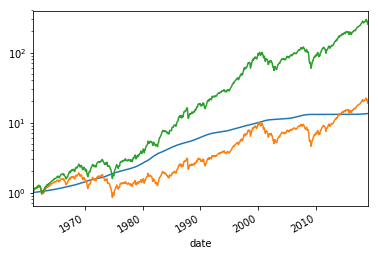

In [1095]:
plt.yscale('log')
cumulative_RF_df.plot() #riskfree
cumulative_Mkt_RF_df.plot() #excessMkt
cumulative_Mkt_df.plot() #Mkt

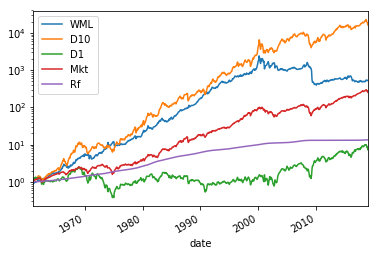

In [1096]:
plt.yscale('log')

cumulative_momentum_df.plot(label = 'WML')  
cumulative_winner_df.plot(label = 'D10') 
cumulative_loser_df.plot(label = 'D1')
cumulative_Mkt_df.plot(label = 'Mkt')
cumulative_RF_df.plot(label = 'Rf') 
#cumulative_Mkt_RF_df.plot() #excessMkt
 
plt.legend(loc=2)

In [1097]:
ExRet = wml - RF

In [1098]:
print(ExRet)

date
1960-01-29    0.000000
1960-02-29    0.000000
1960-03-31    0.000000
1960-04-29    0.000000
1960-05-31    0.000000
1960-06-30    0.000000
1960-07-29    0.000000
1960-08-31    0.000000
1960-09-30    0.000000
1960-10-31    0.000000
1960-11-30    0.000000
1960-12-30    0.000000
1961-01-31   -0.094980
1961-02-28    0.023007
1961-03-30    0.047861
1961-04-28    0.049614
1961-05-31   -0.054422
1961-06-30    0.010030
1961-07-31    0.020996
1961-08-31    0.011833
1961-09-29    0.017184
1961-10-31    0.060150
1961-11-30    0.027186
1961-12-29   -0.028990
1962-01-31   -0.038257
1962-02-28    0.005946
1962-03-30    0.024948
1962-04-30    0.020826
1962-05-31    0.009978
1962-06-29    0.072562
                ...   
2016-07-29   -0.032141
2016-08-31   -0.044472
2016-09-30   -0.029976
2016-10-31    0.011999
2016-11-30    0.040124
2016-12-30   -0.022435
2017-01-31   -0.011768
2017-02-28   -0.017612
2017-03-31   -0.031396
2017-04-28    0.010069
2017-05-31    0.043614
2017-06-30   -0.044676
2017-0

In [1099]:
ExRet.describe()

count    708.000000
mean       0.007044
std        0.058704
min       -0.427934
25%       -0.017651
50%        0.010867
75%        0.037275
max        0.324139
dtype: float64

In [1100]:
Mkt_RF.describe()

count    708.000000
mean       0.005116
std        0.043521
min       -0.232400
25%       -0.019450
50%        0.007800
75%        0.033075
max        0.161000
Name: Mkt-RF, dtype: float64

In [1101]:
Sharpe_ratio_wml = ExRet.mean()/ExRet.std()
Sharpe_ratio_wml

0.11999323648513945

In [1102]:
A_Sharpe_ratio_wml = (12**0.5) * Sharpe_ratio
A_Sharpe_ratio_wml

0.7622703524055535

In [1103]:
d9_1 = d9+1
d8_1 = d8+1
d7_1 = d7+1
d6_1 = d6+1
d5_1 = d5+1
d4_1 = d4+1
d3_1 = d3+1
d2_1 = d2+1

In [1104]:
cumulative_d9 = d9_1.copy()
cumulative_d9 = cumulative_d9.iloc[11:]
cumulative_d9 = s.cumprod(cumulative_d9)

cumulative_d8 = d8_1.copy()
cumulative_d8 = cumulative_d8.iloc[11:]
cumulative_d8 = s.cumprod(cumulative_d8)

cumulative_d7 = d7_1.copy()
cumulative_d7 = cumulative_d7.iloc[11:]
cumulative_d7 = s.cumprod(cumulative_d7)

cumulative_d6 = d6_1.copy()
cumulative_d6 = cumulative_d6.iloc[11:]
cumulative_d6 = s.cumprod(cumulative_d6)

cumulative_d5 = d5_1.copy()
cumulative_d5 = cumulative_d5.iloc[11:]
cumulative_d5 = s.cumprod(cumulative_d5)

cumulative_d4 = d4_1.copy()
cumulative_d4 = cumulative_d4.iloc[11:]
cumulative_d4 = s.cumprod(cumulative_d4)

cumulative_d3 = d3_1.copy()
cumulative_d3 = cumulative_d3.iloc[11:]
cumulative_d3 = s.cumprod(cumulative_d3)

cumulative_d2 = d2_1.copy()
cumulative_d2 = cumulative_d2.iloc[11:]
cumulative_d2 = s.cumprod(cumulative_d2)


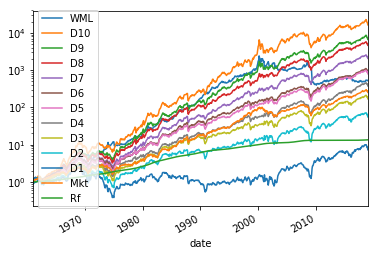

In [1105]:
plt.yscale('log')
cumulative_momentum_df.plot(label = 'WML')
cumulative_winner_df.plot(label='D10')
cumulative_d9.plot(label='D9')
cumulative_d8.plot(label='D8')
cumulative_d7.plot(label='D7')
cumulative_d6.plot(label='D6')
cumulative_d5.plot(label='D5')
cumulative_d4.plot(label='D4')
cumulative_d3.plot(label='D3')
cumulative_d2.plot(label='D2')
cumulative_loser_df.plot(label='D1')
cumulative_Mkt_df.plot(label='Mkt')
cumulative_RF_df.plot(label='Rf')

plt.legend(loc=6)

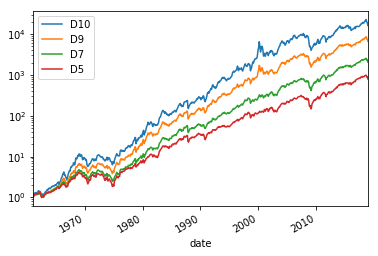

In [1106]:
plt.yscale('log')

cumulative_winner_df.plot(label='D10')
cumulative_d9.plot(label='D9')
#cumulative_d8.plot(label='D8')
cumulative_d7.plot(label='D7')
#cumulative_d6.plot(label='D6')
cumulative_d5.plot(label='D5')
#cumulative_d4.plot(label='D4')
#cumulative_d3.plot(label='D3')
#cumulative_d2.plot(label='D2')
#cumulative_loser_df.plot(label='D1')

plt.legend(loc=2)

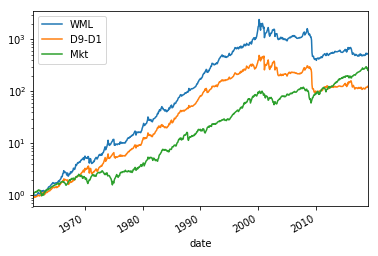

In [1107]:
plt.yscale('log')

cumulative_momentum_df.plot(label = 'WML')
cumulative_d9_d1.plot(label = 'D9-D1')
cumulative_Mkt_df.plot(label='Mkt')
plt.legend(loc=2)

In [1108]:
#d10.to_excel(r'Monthly_D10.xlsx')
#d9.to_excel(r'Monthly_D9.xlsx')
#d8.to_excel(r'Monthly_D8.xlsx')
#d7.to_excel(r'Monthly_D7.xlsx')
#d6.to_excel(r'Monthly_D6.xlsx')
#d5.to_excel(r'Monthly_D5.xlsx')
#d4.to_excel(r'Monthly_D4.xlsx')
#d3.to_excel(r'Monthly_D3.xlsx')
#d2.to_excel(r'Monthly_D2.xlsx')
#d1.to_excel(r'Monthly_D1.xlsx')
#wml.to_excel(r'Monthly_WML.xlsx')
#Mkt_RF.to_excel(r'Monthly_Mkt-Rf.xlsx')
#RF.to_excel(r'Monthly_Rf.xlsx')
#Mkt.to_excel(r'Monthly_Mkt.xlsx')

In [1109]:
#cumulative_momentum_df.to_excel(r'Monthly_WML_cum.xlsx')
#cumulative_winner_df.to_excel(r'Monthly_D10_cum.xlsx')
#cumulative_d9.to_excel(r'Monthly_D9_cum.xlsx')
#cumulative_d8.to_excel(r'Monthly_D8_cum.xlsx')
#cumulative_d7.to_excel(r'Monthly_D7_cum.xlsx')
#cumulative_d6.to_excel(r'Monthly_D6_cum.xlsx')
#cumulative_d5.to_excel(r'Monthly_D5_cum.xlsx')
#cumulative_d4.to_excel(r'Monthly_D4_cum.xlsx')
#cumulative_d3.to_excel(r'Monthly_D3_cum.xlsx')
#cumulative_d2.to_excel(r'Monthly_D2_cum.xlsx')
#cumulative_loser_df.to_excel(r'Monthly_D1_cum.xlsx')
#cumulative_Mkt_df.to_excel(r'Monthly_Mkt_cum.xlsx')
#cumulative_RF_df.to_excel(r'Monthly_Rf_cum.xlsx')
#cumulative_Mkt_RF_df.to_excel(r'Monthly_Mkt-Rf_cum.xlsx')

In [1110]:
Momentum_Monthly = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,wml,Mkt,RF,Mkt_RF], axis=1, join_axes=[d1.index])
Momentum_Monthly.columns = ["D1", "D2", "D3", "D4","D5","D6","D7","D8","D9","D10","WML","Mkt","Rf","Mkt-Rf"]
print(Momentum_Monthly)

                  D1        D2        D3        D4        D5        D6  \
date                                                                     
1960-01-29  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-02-29  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-03-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-04-29  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-05-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-06-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-07-29  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-09-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-10-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-11-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-12-30  0.000000  0.000000  0.0000

In [1112]:
#Momentum_Monthly.to_excel(r'Momentum_Monthly.xlsx')